In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("C:\\Users\\youss\\Desktop\\IMDb Movies India.csv", encoding='latin1')
data 

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,5659.0,5.898533,1.381165,1.1,5.0,6.1,6.9,10.0


In [8]:
data.describe(include="object")

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659,5659,5659,5659,5659
unique,5385,91,174,376,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,90,41,104,52,57


In [9]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [10]:
data['Year'] = data['Year'].str.extract('(\d+)').astype(int)

In [11]:
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)

In [12]:
data['Duration'] = data['Duration'].str.replace(' min', '').astype(int)


data.rename(columns={'Duration': 'Duration (min)'}, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            5659 non-null   object 
 1   Year            5659 non-null   int32  
 2   Duration (min)  5659 non-null   int32  
 3   Genre           5659 non-null   object 
 4   Rating          5659 non-null   float64
 5   Votes           5659 non-null   int32  
 6   Director        5659 non-null   object 
 7   Actor 1         5659 non-null   object 
 8   Actor 2         5659 non-null   object 
 9   Actor 3         5659 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 420.0+ KB


In [14]:
data

,Name,Year,Duration (min),Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


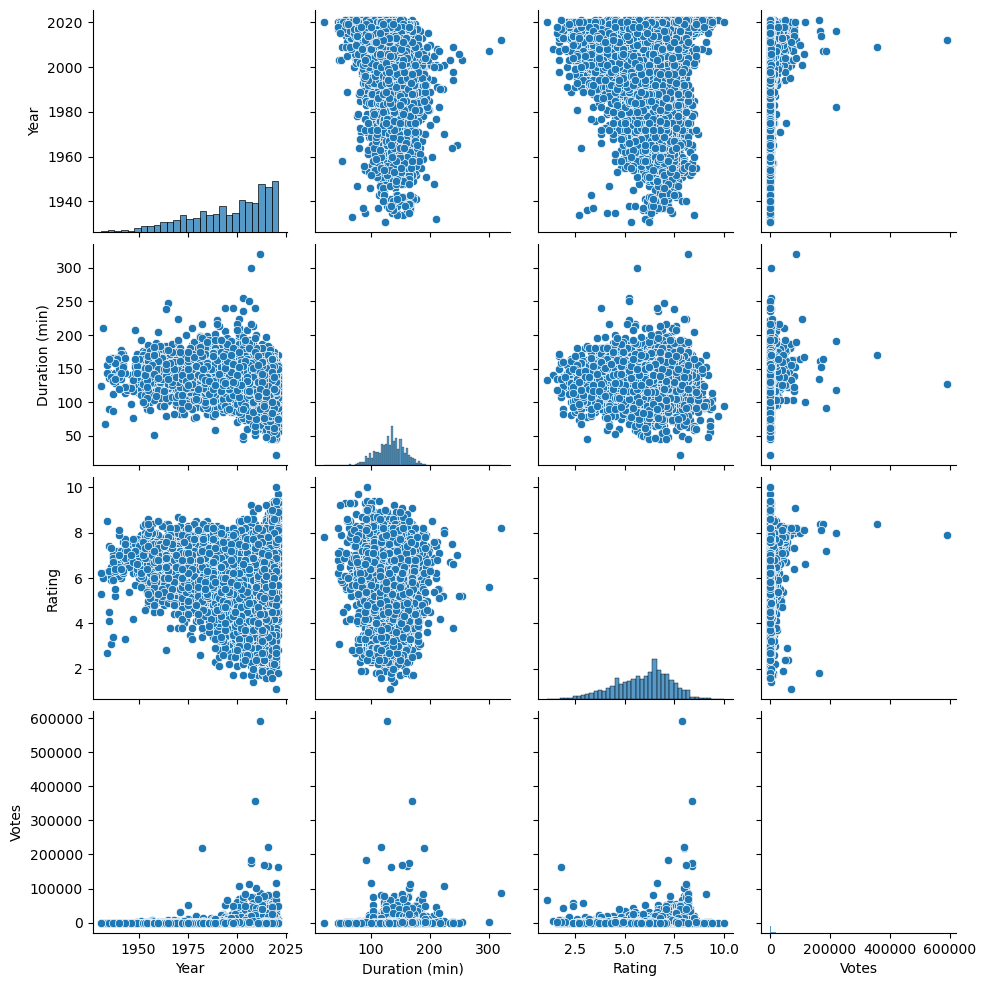

In [15]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data)


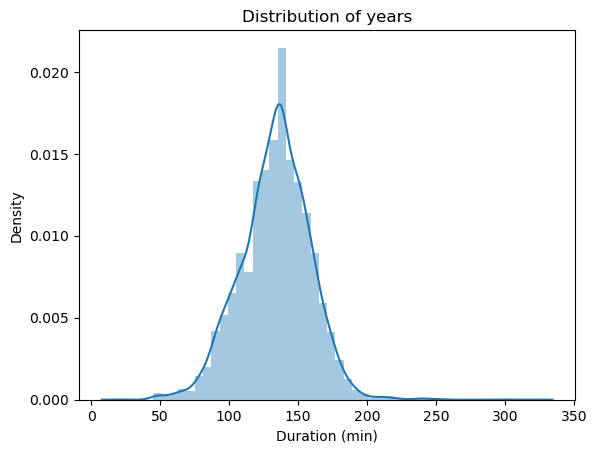

In [16]:
sns.distplot(data["Duration (min)"])
plt.title("Distribution of years")
plt.show()

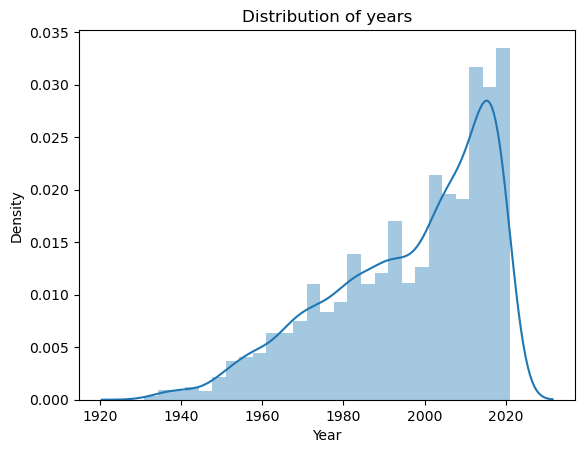

In [17]:
sns.distplot(data["Year"])
plt.title("Distribution of years")
plt.show()

Text(0.5, 1.0, 'Distribution of movie ratings')

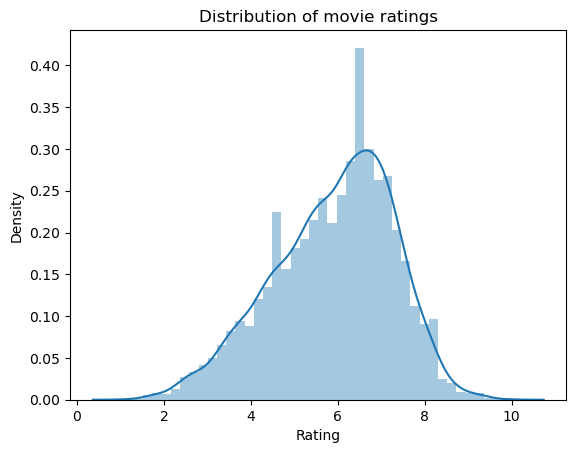

In [18]:
sns.distplot(data["Rating"])
plt.title("Distribution of movie ratings")

Text(0.5, 1.0, ' duration affection on rating')

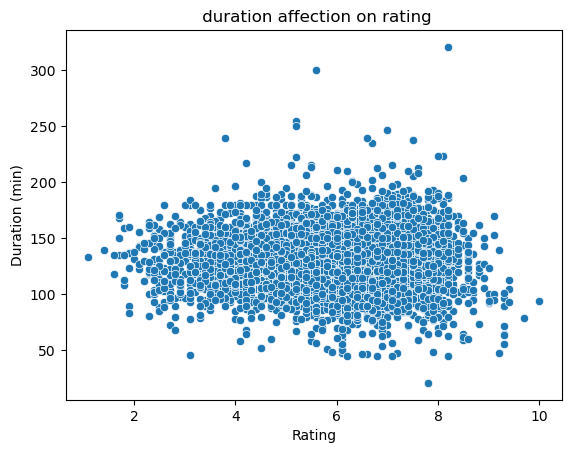

In [19]:
sns.scatterplot(y="Duration (min)",x="Rating",data=data)
plt.title(" duration affection on rating")

Text(0.5, 1.0, ' votes affection on rating')

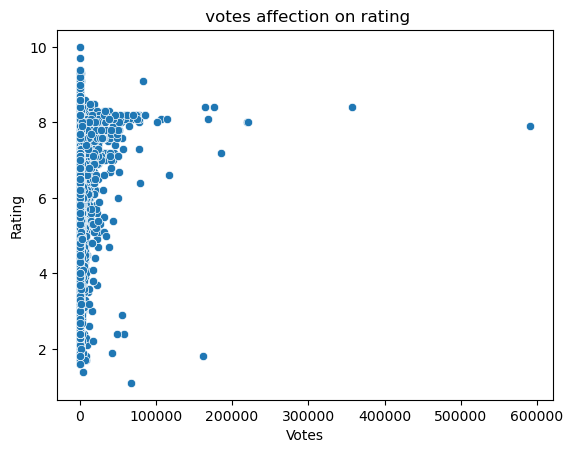

In [20]:
sns.scatterplot(x="Votes",y="Rating",data=data)
plt.title(" votes affection on rating")

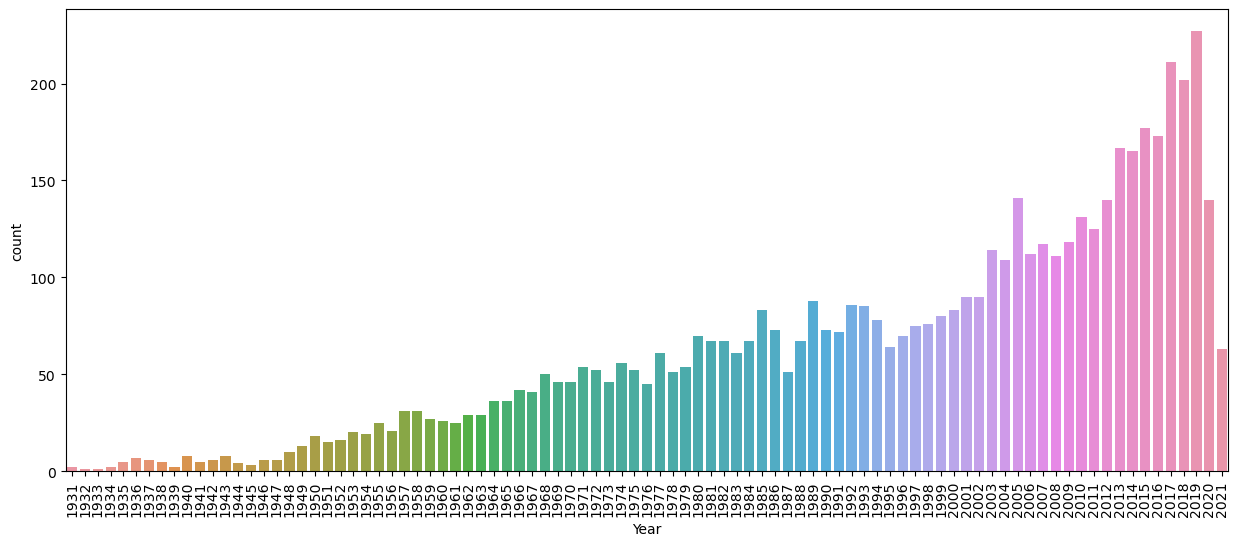

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(x=data["Year"])
plt.xticks(rotation=90)
plt.show()

In [22]:
year_count = data.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
sort_values(by='count', ascending=False).reset_index()

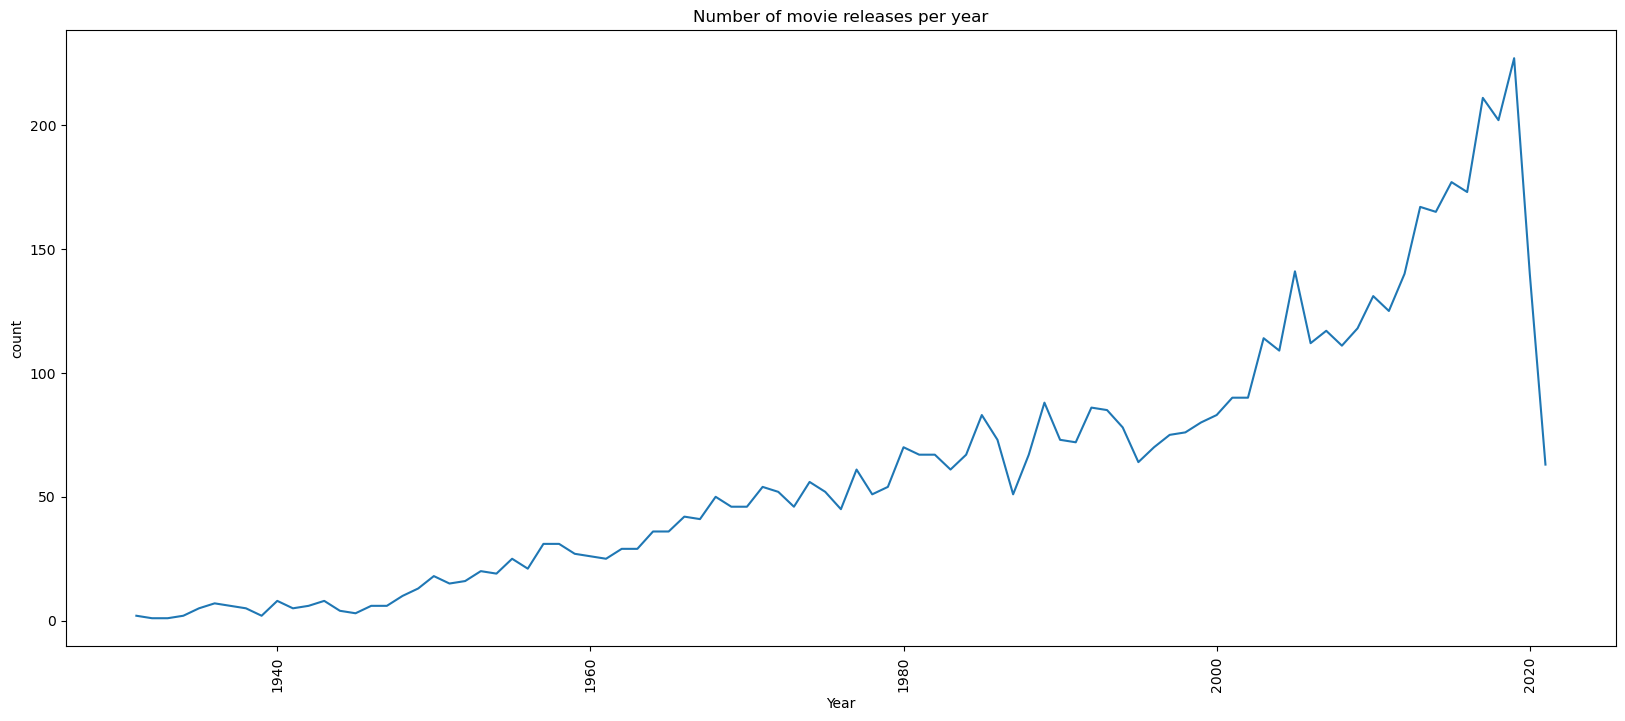

In [23]:
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=year_count, x='Year', y='count')
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

In [24]:
top_10=data[["Name","Genre","Rating"]].sort_values(by="Rating",ascending=False).head(10)
print("TOP 10 movies based on ratings")
top_10

TOP 10 movies based on ratings


,Name,Genre,Rating
8339,Love Qubool Hai,"Drama, Romance",10.0
5410,Half Songs,"Music, Romance",9.7
6852,June,Drama,9.4
14222,The Reluctant Crime,Drama,9.4
5077,Gho Gho Rani,"History, Romance",9.4
1314,Ashok Vatika,Drama,9.3
13231,Sindhustan,"Documentary, Family, History",9.3
8344,Love Sorries,"Comedy, Drama, Romance",9.3
12673,Secrets of Sinauli,"Documentary, History",9.3
11843,Refl3ct,Sci-Fi,9.3


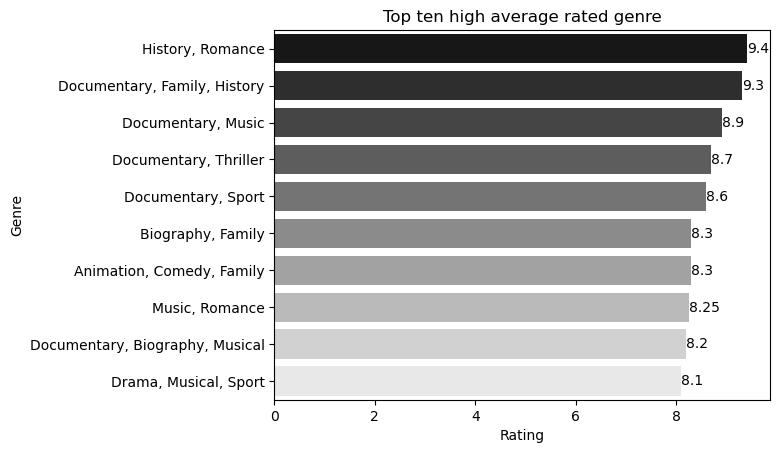

In [25]:
genre_rate = data.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

ax = sns.barplot(data=genre_rate, x='Rating', y='Genre', palette='gist_gray')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated genre')
plt.show()

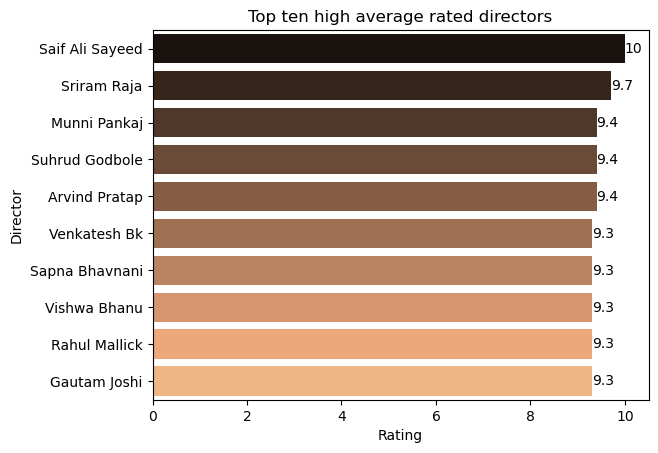

In [26]:
# plot top ten high average rating directors
director_rate = data.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=director_rate, x='Rating', y='Director', palette='copper')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated directors')
plt.show()

In [27]:
top_10=data[["Name","Genre","Votes"]].sort_values(by="Votes",ascending=False).head(10)
print("TOP 10 movies based on votes")
top_10

TOP 10 movies based on votes


,Name,Genre,Votes
8219,Life of Pi,"Adventure, Drama, Fantasy",591417
75,3 Idiots,"Comedy, Drama",357889
8233,Lion,"Biography, Drama",220526
4848,Gandhi,"Biography, Drama, History",220118
14038,The Darjeeling Limited,"Adventure, Comedy, Drama",185127
8228,Like Stars on Earth,"Drama, Family",175810
10882,PK,"Comedy, Drama, Musical",168150
3410,Dangal,"Action, Biography, Drama",165074
11463,Radhe,"Action, Crime, Thriller",162455
3829,Dil Bechara,"Comedy, Drama, Romance",117377


Text(0.5, 1.0, 'Director with no of movies ')

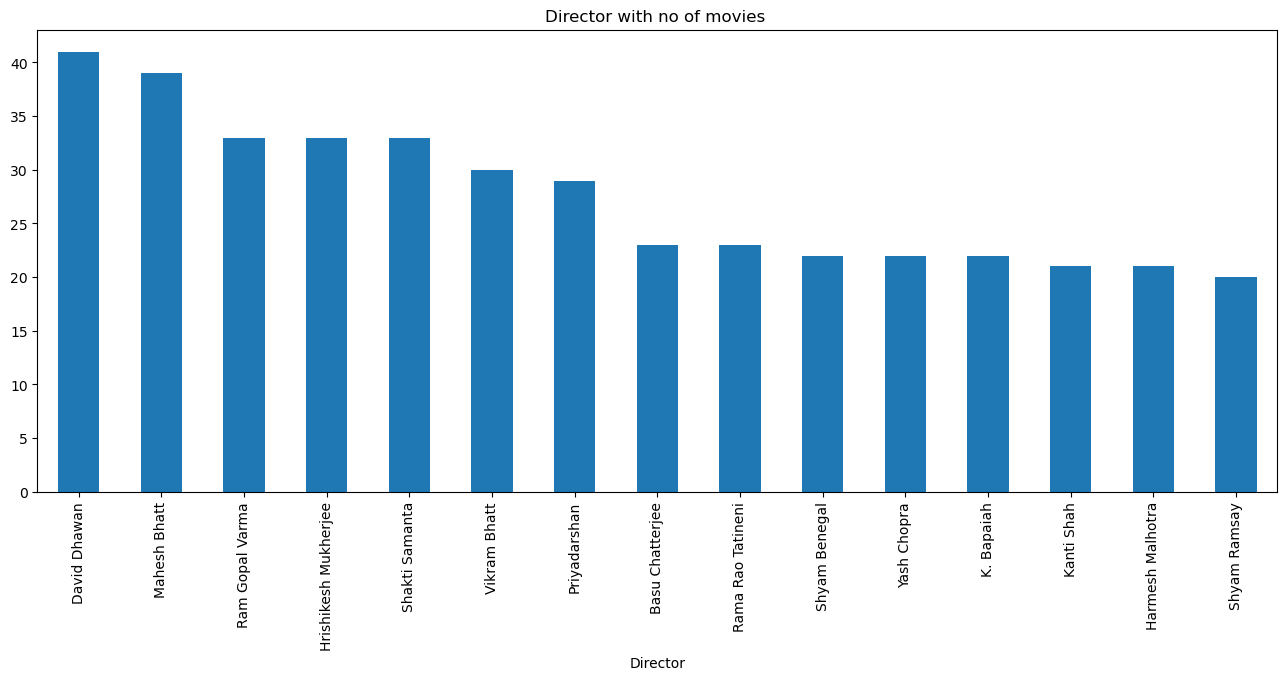

In [28]:
plt.figure(figsize=(16,6))
x=data["Director"].value_counts(ascending=False)[:15].plot(kind="bar")


plt.xticks(rotation=90)
plt.title("Director with no of movies ")

Text(0.5, 1.0, 'Popular Actor ')

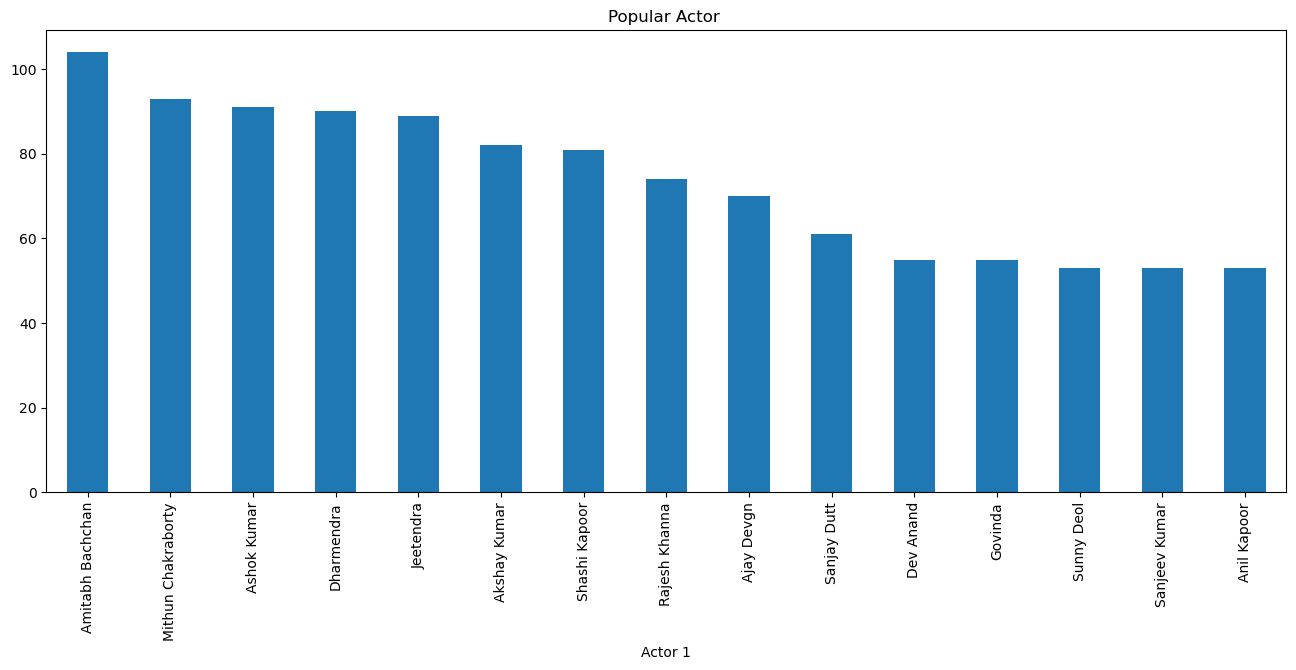

In [29]:
plt.figure(figsize=(16,6))
y=data["Actor 1"].value_counts(ascending=False)[:15].plot(kind="bar")


plt.xticks(rotation=90)
plt.title("Popular Actor ")

In [30]:
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')


In [31]:
encoder = OneHotEncoder(sparse=False)
genre_encoded = encoder.fit_transform(data[['Genre']])
genre_data = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['Genre']))


In [32]:
# Combining encoded genre with original DataFrame
data = data.reset_index(drop=True)
data = pd.concat([data, genre_data], axis=1).drop(columns=['Genre'])

In [33]:
data = pd.get_dummies(data, columns=['Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

In [34]:
X = data.drop(columns=['Name', 'Rating'])
y = data['Rating']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [37]:
print('Coefficient of determination: ', model.score(X_train, y_train))

Coefficient of determination:  0.9698973757175495


In [38]:
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.0756188195181475


In [42]:
y_pred_LR = model.predict(X_test)
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_LR.ravel(),
                        'residual': y_test - y_pred_LR}
                      )
results.head()

,actual,predicted,residual
5384,3.6,3.604859,-0.004859
11150,6.3,6.538777,-0.238777
10464,7.4,7.409303,-0.009303
1320,7.3,7.265106,0.034894
4540,4.2,4.185811,0.014189


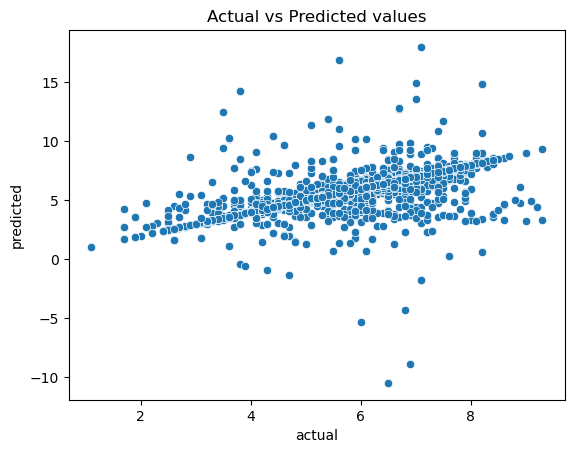

In [43]:
sns.scatterplot(x=results['actual'], y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

In [44]:
# Example prediction
example_movie = X_test.iloc[0]
predicted_rating = model.predict([example_movie])[0]
print(f'Predicted Rating for example movie: {predicted_rating}')

Predicted Rating for example movie: 3.6048588662303587
